In [1]:
!date

Sat Oct 19 19:59:34 PDT 2024


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/scquint_4


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from matplotlib import colors as mcolors

In [4]:
import seaborn.objects as so

In [5]:
# %%bash
# geneBody_coverage.py -i /c4/home/derek/data1/HDD-2/derek/SLR_temp/CAT_20220904_PBMC/sample_1/merged/merged_complete_internal_mod4.bam -r ./hg38.HouseKeepingGenes.bed -o aggregate_merged

In [6]:
ls -lt

total 448
-rw-r--r-- 1 derek nowakowskilab 105093 Oct 19 19:03 CoveragePlots_.ipynb
-rw-r--r-- 1 derek nowakowskilab  21617 Oct 17 13:46 genebody_plot_techs.pdf
-rw-r--r-- 1 derek nowakowskilab  96050 Oct 14 01:00 CoveragePlots.ipynb
-rw-r--r-- 1 derek nowakowskilab 120819 Aug 17 00:30 GenomeTracks.ipynb
-rw-r--r-- 1 derek nowakowskilab   1648 Aug 16 14:56 bigwig_initial_test.ini
drwxr-xr-x 3 derek nowakowskilab    258 Jul 22 12:20 plots/
-rw-r--r-- 1 derek nowakowskilab  11705 Jul  2 12:01 bigwig_CD20.pdf
-rw-r--r-- 1 derek nowakowskilab  19547 Jul 10  2023 bigwig_PTPRC.pdf
-rw-r--r-- 1 derek nowakowskilab  41507 May 22  2023 bigwig_GAPDH.png
-rw-r--r-- 1 derek nowakowskilab  24352 May 16  2023 bigwig_PTPRC.png


## Plot Gene body coverage per technology

In [27]:
df_SLR_internal=pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_2/gene_body_plots/internal_subsample.geneBodyCoverage.txt',
           sep='\t',
             index_col=0,
            header=None,
           ).T
df_SLR_internal.columns = ['percentile','density']
df_SLR_internal['tech'] = 'scSLR_internal'

df_SLR_5prime=pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_2/gene_body_plots/5prime_subsample.geneBodyCoverage.txt',
           sep='\t',
             index_col=0,
            header=None,
           ).T
df_SLR_5prime.columns = ['percentile','density']
df_SLR_5prime['tech'] = 'scSLR_5prime'


df_10X=pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/10X/gene_body_plots/10X_subsample.geneBodyCoverage.txt',
           sep='\t',
             index_col=0,
            header=None,
           ).T

df_10X.columns = ['percentile','density']
df_10X['tech'] = '10X_5prime'



df_SS3_UMI =pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/reference/SS3_PBMC/solo_outs_yesUMI/SS3_yesUMI_subsample.geneBodyCoverage.txt',
           sep='\t',
             index_col=0,
            header=None,
           ).T

df_SS3_UMI.columns = ['percentile','density']
df_SS3_UMI['tech'] = 'SS3_UMI'


df_SS3_noUMI=pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/reference/SS3_PBMC/solo_outs_noUMI/SS3_noUMI_subsample.geneBodyCoverage.txt',
           sep='\t',
             index_col=0,
            header=None,
           ).T
df_SS3_noUMI.columns = ['percentile','density']
df_SS3_noUMI['tech'] = 'SS3_noUMI'

df_VASA=pd.read_csv('/c4/home/derek/data1/derek/reference/VASA/SRR14783059_STAR_outs/VASA_subsample.geneBodyCoverage.txt',
           sep='\t',
             index_col=0,
            header=None,
           ).T
df_VASA.columns = ['percentile','density']
df_VASA['tech'] = 'VASA'


In [28]:
df = pd.concat([df_SLR_internal,
                df_SLR_5prime,
                # df_10X, 
                # df_SS3_UMI,
                # df_SS3_noUMI,
                # df_VASA
               ], ignore_index=True
       
               # names = ['Percentile','scSLR_internal','scSLR_5prime','10X_5prime','SS3_UMI','SS3_noUMI']
         )

In [7]:
from ast import literal_eval

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

plotly_map = [rgb_to_hex(literal_eval(px.colors.qualitative.Safe[i][3:])) for i in range(len(px.colors.qualitative.Vivid))] 

In [9]:
fig, ax = plt.subplots(1,1,figsize = (5,5))

sns.lineplot(data=df,
            x="percentile",
            y='density',
            hue='tech',
             linewidth = 3,
            palette=plotly_map,
             alpha=0.8,
             ax = ax,
              # style='tech'

            )

# ax.yaxis.set_major_locator(plt.MaxNLocator(6))

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_ylabel("Read coverage")
ax.set_xlabel("Gene body percentile (5'−>3')")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["scSLR internal", 
                    "scSLR 5'", 
                    "10X 5'", 
                    "SS3 UMI reads", 
                    "SS3 w/o UMI", 
                    "VASA-seq"
                   ])

# fig.savefig('genebody_plot_techs.pdf')

## Plot Genebody coverage per scSLR library portion 

In [10]:
input_dir = '/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/STAR_outs/GW17_1/StarOut/'

In [11]:
df_SLR_internal=pd.read_csv(input_dir+'subsample_internal.geneBodyCoverage.txt',
           sep='\t',
             index_col=0,
            header=None,
           ).T
df_SLR_internal.columns = ['percentile','density']
df_SLR_internal['tech'] = 'scSLR_internal'


df_SLR_5prime=pd.read_csv(input_dir+'subsample_5prime.geneBodyCoverage.txt',
           sep='\t',
             index_col=0,
            header=None,
           ).T
df_SLR_5prime.columns = ['percentile','density']
df_SLR_5prime['tech'] = 'scSLR_5prime'


df_SLR_3prime=pd.read_csv(input_dir+'subsample_3prime.geneBodyCoverage.txt',
           sep='\t',
             index_col=0,
            header=None,
           ).T
df_SLR_3prime.columns = ['percentile','density']
df_SLR_3prime['tech'] = 'scSLR_3prime'

In [12]:
df = pd.concat([df_SLR_internal, 
                df_SLR_5prime,
               df_SLR_3prime
               ], ignore_index=True

         )

/scratch/derek/ipykernel_1402051/2617328723.py:3: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.lineplot(data=df,


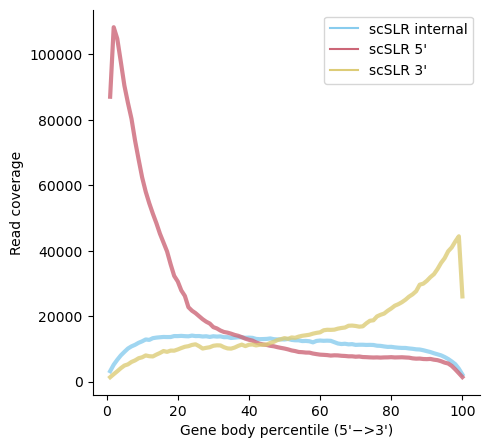

In [13]:
fig, ax = plt.subplots(1,1,figsize = (5,5))

sns.lineplot(data=df,
            x="percentile",
            y='density',
            hue='tech',
             linewidth = 3,
            palette=plotly_map,
             alpha=0.8,
             ax = ax,
              # style='tech'

            )

# ax.yaxis.set_major_locator(plt.MaxNLocator(6))

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_ylabel("Read coverage")
ax.set_xlabel("Gene body percentile (5'−>3')")

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, ["scSLR internal", 
                    "scSLR 5'", 
                   "scSLR 3'"
                   ])

# fig.savefig('genebody_plot_techs.pdf')

In [18]:
input_dir = '/c4/home/derek/data1/derek/data_scSLR/PBMC/STAR_outs/sample_2/UMItools_dedup_orig/'

In [20]:
df_SLR_internal=pd.read_csv(input_dir+'/UMItools_internal_outs/internal_dedup.geneBodyCoverage.txt',
           sep='\t',
             index_col=0,
            header=None,
           ).T
df_SLR_internal.columns = ['percentile','density']
df_SLR_internal['tech'] = 'scSLR_internal'


df_SLR_5prime=pd.read_csv(input_dir+'/UMItools_5prime_outs/5prime_dedup.geneBodyCoverage.txt',
           sep='\t',
             index_col=0,
            header=None,
           ).T
df_SLR_5prime.columns = ['percentile','density']
df_SLR_5prime['tech'] = 'scSLR_5prime'



In [21]:
df = pd.concat([df_SLR_internal, 
                df_SLR_5prime,
               ], ignore_index=True

         )

/scratch/derek/ipykernel_1402051/3981815242.py:3: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  sns.lineplot(data=df,


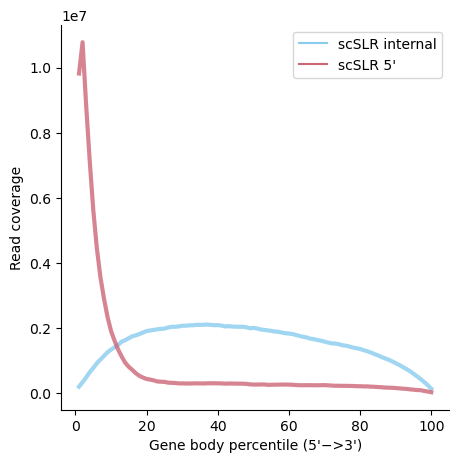

In [22]:
fig, ax = plt.subplots(1,1,figsize = (5,5))

sns.lineplot(data=df,
            x="percentile",
            y='density',
            hue='tech',
             linewidth = 3,
            palette=plotly_map,
             alpha=0.8,
             ax = ax,
              # style='tech'

            )

# ax.yaxis.set_major_locator(plt.MaxNLocator(6))

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_ylabel("Read coverage")
ax.set_xlabel("Gene body percentile (5'−>3')")

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, ["scSLR internal", 
                    "scSLR 5'", 
                   ])